In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
ds=pd.read_csv(r"C:\Users\arunf\OneDrive\Documents\Data Science\Machine Learning\DataSet\customer_data.csv")

In [3]:
ds

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,0,58988196,5,1289.0,1,173000.0,2,15,5,112,3,350702,200.000000
1121,0,58987926,5,NaN,2,50000.0,2,15,5,108,4,450000,169.000000
1122,0,58995381,7,1220.0,3,76000.0,2,11,2,90,5,71002,1.000000
1123,0,58998054,4,1250.0,3,137000.0,2,8,5,90,5,72000,1.000000


In [4]:
ds.isnull().sum()

label       0
id          0
fea_1       0
fea_2     149
fea_3       0
fea_4       0
fea_5       0
fea_6       0
fea_7       0
fea_8       0
fea_9       0
fea_10      0
fea_11      0
dtype: int64

In [5]:
a=ds['fea_2'].mean()
a

1283.9113729508197

In [6]:
ds['fea_2']=ds['fea_2'].fillna(a)

In [7]:
ds.isnull().sum()

label     0
id        0
fea_1     0
fea_2     0
fea_3     0
fea_4     0
fea_5     0
fea_6     0
fea_7     0
fea_8     0
fea_9     0
fea_10    0
fea_11    0
dtype: int64

In [8]:
x=ds.iloc[:,2:13]
x

,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,5,1245.500000,3,77000.0,2,15,5,109,5,151300,244.948974
1,4,1277.000000,1,113000.0,2,8,-1,100,3,341759,207.173840
2,7,1298.000000,1,110000.0,2,11,-1,101,5,72001,1.000000
3,7,1335.500000,1,151000.0,2,11,5,110,3,60084,1.000000
4,7,1283.911373,2,59000.0,2,11,5,108,4,450081,197.403141
...,...,...,...,...,...,...,...,...,...,...,...
1120,5,1289.000000,1,173000.0,2,15,5,112,3,350702,200.000000
1121,5,1283.911373,2,50000.0,2,15,5,108,4,450000,169.000000
1122,7,1220.000000,3,76000.0,2,11,2,90,5,71002,1.000000
1123,4,1250.000000,3,137000.0,2,8,5,90,5,72000,1.000000


In [12]:
wcss=[]

In [13]:
for i in range(1,15):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=1)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    

C:\Users\arunf\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


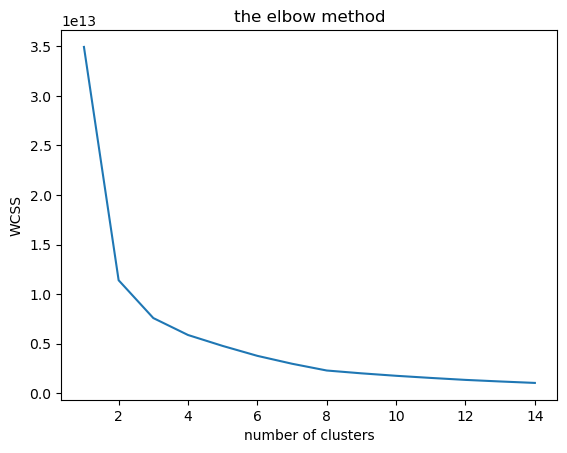

In [15]:
plt.plot(range(1,15),wcss)
plt.title("the elbow method")
plt.xlabel("number of clusters")
plt.ylabel("WCSS")
plt.show()

In [16]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=1)
y_kmean=kmeans.fit_predict(x)

In [17]:
y_kmean

array([1, 0, 1, ..., 1, 1, 1])

In [18]:
cluster_label=pd.Series(y_kmean)

In [19]:
cluster_label

0       1
1       0
2       1
3       1
4       0
       ..
1120    0
1121    0
1122    1
1123    1
1124    1
Length: 1125, dtype: int32

In [22]:
ds['cluster']=cluster_label
ds=ds.iloc[:,[13,0,1,2,3,4,5,6,7,8,9,10,11,12]]
ds

,cluster,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,1,54982665,5,1245.500000,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,0,59004779,4,1277.000000,1,113000.0,2,8,-1,100,3,341759,207.173840
2,1,0,58990862,7,1298.000000,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,1,58995168,7,1335.500000,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,0,54987320,7,1283.911373,2,59000.0,2,11,5,108,4,450081,197.403141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,0,0,58988196,5,1289.000000,1,173000.0,2,15,5,112,3,350702,200.000000
1121,0,0,58987926,5,1283.911373,2,50000.0,2,15,5,108,4,450000,169.000000
1122,1,0,58995381,7,1220.000000,3,76000.0,2,11,2,90,5,71002,1.000000
1123,1,0,58998054,4,1250.000000,3,137000.0,2,8,5,90,5,72000,1.000000


In [23]:
ds.groupby(ds.cluster).mean()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
cluster,,,,,,,,,,,,,
0,0.211321,5.790318e+07,5.773585,1282.459538,2.109434,112777.358491,1.981132,11.981132,3.441509,102.603774,4.116981,418907.698113,188.676322
1,0.204489,5.782105e+07,5.408978,1282.181151,2.401496,103485.037406,1.908978,10.567332,5.289277,100.415212,4.195761,82130.002494,116.594557
2,0.086207,5.775072e+07,5.172414,1314.469554,2.413793,398500.000000,1.965517,10.017241,4.879310,97.931034,4.551724,143396.637931,144.238272
